In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import src.shark_resources as sr
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
sharks = pd.read_csv('data/attacks.csv', encoding='ISO-8859-1')

In [3]:
sharks.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [4]:
sharks.drop(columns = ['pdf','Case Number','href formula', 'href','Case Number.1', 'Case Number.2', 'Unnamed: 22','Unnamed: 23'], inplace = True )

In [5]:
sharks.dropna(how='all', inplace = True)

In [6]:
sharks.isna().sum()

Date                         7
Year                         9
Type                        11
Country                     57
Area                       462
Location                   547
Activity                   551
Name                       217
Sex                        572
Age                       2838
Injury                      35
Fatal (Y/N)                546
Time                      3361
Species                   2845
Investigator or Source      24
original order               0
dtype: int64

In [7]:
sharks['original order'] = sharks['original order'].apply(lambda x : x-2).astype(int)

In [8]:
sharks.sort_values('original order', ascending= True, inplace = True)

In [9]:
sharks.set_index('original order', drop = True, inplace = True)

In [10]:
sharks.dropna(how = 'all', inplace = True)

In [11]:
sharks.isna().sum()

Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
dtype: int64

In [20]:
def find_age(x):
    if re.match('\d{1,2}',x) != None and x != np.nan:
        a = re.match('\d{1,2}',x).group(0)
        return a
    else:
        x = np.nan

In [22]:
sharks['Age'] = sharks['Age'].apply(lambda x : find_age(x) if(np.all(pd.notnull(x))) else x)

In [23]:
sharks['Age'] = sharks['Age'].astype(float)

In [24]:
sharks['Age'].fillna(sharks['Age'].mean(), inplace = True)

In [25]:
q = list(sharks['Age'])

In [26]:
q

[15.0,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 16.0,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 13.0,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 50.0,
 27.314194112503642,
 27.314194112503642,
 27.31

In [27]:
sharks['Age'] = sharks['Age'].astype(int)

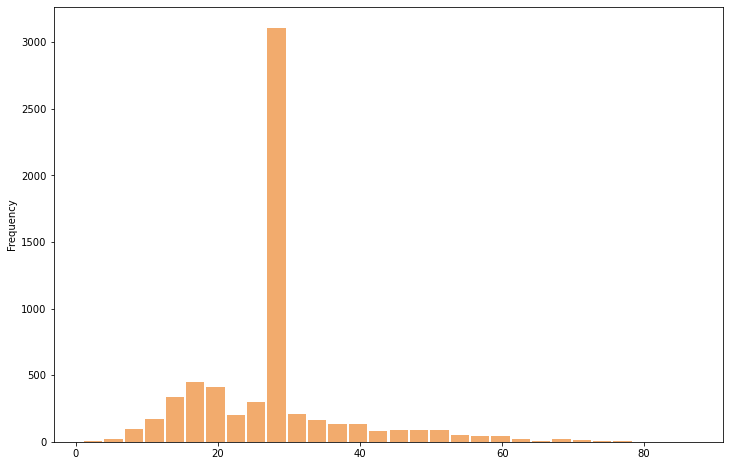

In [37]:
sharks.Age.plot.hist(bins=30, color='#F2AB6D', rwidth=0.90, figsize=(12, 8))


In [29]:
display(sharks.groupby('Age').count().iloc[12:20]['Date'])

Age
14    101
15    139
16    139
17    156
18    153
19    142
20    150
21    122
Name: Date, dtype: int64

In [41]:
gender = sharks.groupby('Sex ').count().drop(labels = ['.','N','M ','lli'], axis = 0)
gender

,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Sex,,,,,,,,,,,,,,
F,637,637,637,634,616,608,584,631,637,637,579,385,370,634
M,5094,5092,5090,5052,4723,4651,4754,5036,5094,5080,4691,2456,2770,5082


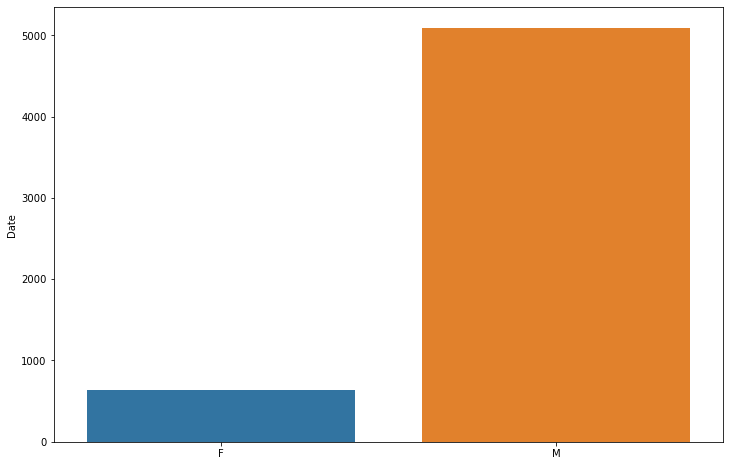

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = ['F','M'], y=gender['Date'])


In [32]:
countries = sharks.groupby('Country').count()

In [33]:
countries_filtered = countries[countries['Date'] >= 500]

In [34]:
display(countries_filtered)

,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Country,,,,,,,,,,,,,,
AUSTRALIA,1338,1337,1337,1324,1294,1215,1319,1197,1338,1332,1225,596,792,1336
SOUTH AFRICA,579,579,579,574,571,535,566,515,579,578,515,349,420,577
USA,2229,2229,2229,2225,2178,2095,2199,2131,2229,2224,2041,1384,1323,2222


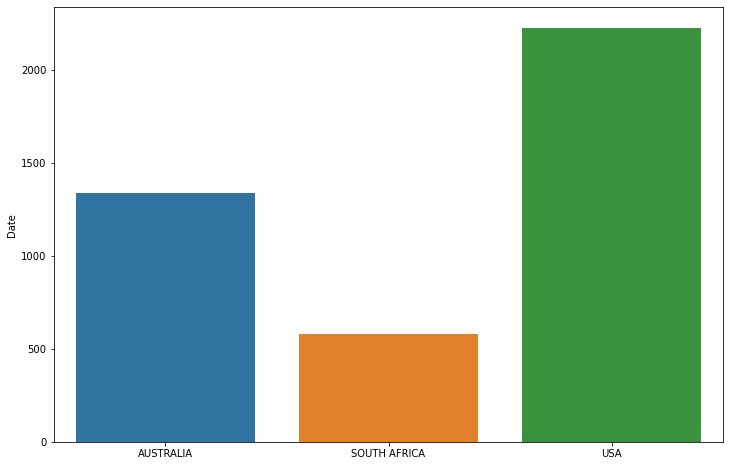

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = list(countries_filtered.index), y=countries_filtered['Date'])
plt.savefig('paises.jpg')

In [36]:
sharks

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
original order,,,,,,,,,,,,,,,
0,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker
1,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,27,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"
2,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,27,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
3,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,27,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
4,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,27,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,27,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
6298,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,27,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
6299,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
